In [13]:
# Loading the libraries
import numpy as np
# numpy stands for numerical python
import pandas as pd
# pandas stands for panel data
import matplotlib.pyplot as plt
#matplot lib stands for matlab plot libray


In [14]:
#read the data file
dataset = pd.read_csv("Churn_Modelling.csv")
# Check if the data is properly loaded
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# New Section

# y variable is exited. Xs are Credit Score, Geography, Gender, Age, Tenure, Balance, Numoproducts,Hascrcard, isactive member, estimated salary

the business beleives that these xs impact outcome y. Gender and Geography are categorical varaibles that are not encoded or hard coded.

Hascredit card and isactivemember also appear to be categorical variables bu they have been encoded.

Our next step will be to remove the redundant columns from the data which are row number, surname, customer id. from analysis perspective these three columns don't add any value.

In [15]:
#iloc function allows us to locate row and column from where we want to pick up the data. In this case : signifies picking up all the rows
# 3:13 signifies picking up columns numbered 3 to 13
#this data is in the form of panel data, which will not allow further mathematics to happen. so we need to convert to numerical python array
# in short we need a numpy array on which we can work.
# this is achieved by putting .valuesS
# python columns numbers start with 0. sO CREDIT SCORE will be column number 3.
# the value 13 does not reflect the last column. python stops at 13-1 , which is 12th column.
# start:stop -> start at a particular index but stop at one bedore the defined stopping point. That is stop at stop -1.
X = dataset.iloc[:,3:13].values
type(X)

numpy.ndarray

Split the X's and Y's so that we can make a model where we input X's and get the Y. tHAT IS THE next step for us. All the features capital X. All output will be small y


In [16]:
# we have selected the column 13, exited as the y variable for all rows.
# we know that we selected all the rows beacause we have used :
# to make things work on python we have to convert the panel data into numpy array
# head works only for panel data not for numpy array.
y = dataset.iloc[:,13].values
y

array([1, 0, 1, ..., 1, 1, 0])

In [17]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

to convert categorical data geography and gender to numerical, we will use label encoder and onehot encoder from sklearn. For this we will import relevant files. 

Apple, oranges, and Mangoes. If they are Labelencoded it will be 1,2, and 3 where 1 represents apple, 2 represents oranges, and 3 represents mangoes.

one hot encoding 
Apple - 1 - 0 0 1
Oranges - 2 - 0 1 0
Mangoes - 3 - 1 0 0

Every category is represented by a set of 0s and only one 1


In [18]:
# importing the relevant libraries from sklearn preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# pass on the functionalities of the library LabelEncoder to another variable which is easier to use as proceed
labelencoder = LabelEncoder()
# Now we have to do the labelencoding for gender
# FIT_TRANSFORM() splits the label encoder function on to the selected column which in this case happens to be gender
# label encoder will convert male/female to 1 and 0
# No need for one hot encoding since gneder is binary
# If category is more than binary then label encoder is needed
X[:,2] = labelencoder.fit_transform(X[:,2])
X
# NEXT STEP IS to label encode the geography
X[:,1] = labelencoder.fit_transform(X[:,1])
X
# To do one hot encoding it was esier in the olden days. Now we have to use a new fucntion created by developers called Column Transfer. This function is a tuple and have
# 3 arguments
#ColumnTransfer(name, object, column number)
# get the library from sklearn.compose
from sklearn.compose import ColumnTransformer
#One hot encoder has been applied to column 1
# I have given the Column Transformer function of a name of my choice which is Country
# The functionality has been passed on to variable ct but still not applied on the data
ct = ColumnTransformer([("country", OneHotEncoder(), [1])], remainder='passthrough')
# We shall now apply on the data
X = ct.fit_transform(X)
X




array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

Convert the data into data frame for easy of understanding. Replace the countries with x1,x2,x3 the values we have after one-hot encoding. The countries hav ebeen replaced by X1,X2,X3 which is a vector.

In [19]:
X = pd.DataFrame(X, columns = ["X1", "X2", "X3", "Credit Score", "Gender", "Age", "Tenure", "Balance", "NumofProducts", "HasCrCard", "IsActive Member", "Estimated Salary"])
X

,X1,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,1,0,0,619,0,42,2,0,1,1,1,101349
1,0,0,1,608,0,41,1,83807.9,1,0,1,112543
2,1,0,0,502,0,42,8,159661,3,1,0,113932
3,1,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,771,1,39,5,0,2,1,0,96270.6
9996,1,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,1,0,0,709,0,36,7,0,1,0,1,42085.6
9998,0,1,0,772,1,42,3,75075.3,2,1,0,92888.5


We want to avoid the dummy variable trap associated with country varaibles x1,x2 and x3. We eliminate one of the variables X1. Note : We could have chosen X2 OR X3 also to eliminate.


In [20]:
#From the data frame drop X1
# AXIS = 1 indicates where should python look for variable X1
# the answer is that it should look for X1 along the X-AXIS and hence axis is set to 1
#If looking along Y axis, then axis should be set to 0

X = X.drop("X1", axis=1)
X

,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,0,0,619,0,42,2,0,1,1,1,101349
1,0,1,608,0,41,1,83807.9,1,0,1,112543
2,0,0,502,0,42,8,159661,3,1,0,113932
3,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270.6
9996,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,0,0,709,0,36,7,0,1,0,1,42085.6
9998,1,0,772,1,42,3,75075.3,2,1,0,92888.5


We have to split the data into training and test. Test size is 20% and then remaning is training.

In [21]:
# train_test_split library is located in sklearn.model.selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature Scaling...When it shud be done? before splitting the data or after splitting the data ? Why?

Standardisation entails x-u/sigma.

If we standardize before splitting, the data set will have only one unique average mu and one unique standard deviation u. 

If we split the data, there are two groups. Train and Test. Train data will have different mean and sd from the test data. So standardizing the train data using the mean and standard deviation of the training sample is more accurate. 

Standardizing the test data using the meand and sd of the samples inside the test data is more accurate.

Therefore we must split the data before we standardize the data to ensure accuracy in measurement of two separate groups or samples.



In [22]:
# To ensure that all of us in this class have the same data under Training and Testing
# We have to set the random_state and make sure all have the same value
# In this case , IT IS 0.
# to standardise the following snippet used. functionality passed on to variable called sc.
# fit_transform is been done on the X-TRAIN DATA. Basically trasnform function is used.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# model is learning the mean and variance from train data aka fit, after learning it is 
# implementint it aka transform 
X_train = sc.fit_transform(X_train)
# model using the mean and variance of train data and applying it on test data, so no need to fit but only transform
X_test = sc.transform(X_test)
X

,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,0,0,619,0,42,2,0,1,1,1,101349
1,0,1,608,0,41,1,83807.9,1,0,1,112543
2,0,0,502,0,42,8,159661,3,1,0,113932
3,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270.6
9996,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,0,0,709,0,36,7,0,1,0,1,42085.6
9998,1,0,772,1,42,3,75075.3,2,1,0,92888.5


There are 11 inputs and 1 ouput. 2 layers in the middle. Each shud have 6 nodes. Activation functions are Relu inside the structure, outside it is Sigmoid. OPTIMIZER IS Adam and the loss function binary cross entropy. Metrics interested in is Accuracy. Epochs 100, batch size 10. Implicitly implementing batch stochastic gradient.

In [23]:
# Importing the Keras libraries and packages
import keras
# sequential because the model has all layers in sequence.
from keras.models import Sequential
from keras.layers import Dense
# Dense implies hidden layers which we cant access from outside
# these are built in keras functions
#Initialising the Deep learning model
classifier = Sequential()
# Adding the input layer
# input dimensions = 11
# The first hidden layer has 6 units, weights are taken randomly from an uniform distribution and activation is Relu.
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
# activation function is Sigmoid
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the DNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the DNN to the Training Set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)





Epoch 1/100
800/800 [==============================] - 3s 1ms/step - loss: 0.5562 - accuracy: 0.7969
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4085 - accuracy: 0.8255
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3957 - accuracy: 0.8279
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3857 - accuracy: 0.8293
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3779 - accuracy: 0.8320
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3707 - accuracy: 0.8353
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3777 - accuracy: 0.8421
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3648 - accuracy: 0.8467
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3684 - accuracy: 0.8471
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3636 - accura

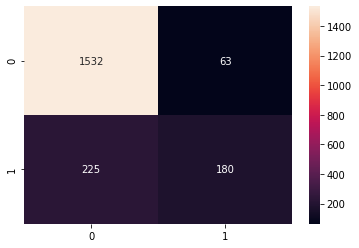

In [24]:
import seaborn as sns
# Predicting the test set results
# send the test data through the trained model
# ge the probability prediction
# determine if the value is less than or more than the cut off value
y_pred = classifier.predict(X_test)
# here the cut off value is 0.5
# if it is more than 0.5, then assigned 1 otherwise 0
#y_test has the actual class information which we will compare the predicted class information
y_pred = (y_pred > 0.5)
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='')







In [25]:
accuracy = (1505+216)/2000
accuracy

0.8605

Predicting the class of a new customer who visits the bank for the first time.

In [26]:
# New Customer
# Geography : France (0,0)
# Credit Score : 600
# Gender : Male (1)
# Age : 40 years old
# Tenure : 3 years
# Balance : $60000
# Number of Products : 2
# Does this customer have a credit card ? Yes (1)
# Is this customer ana ctive member : Yes (1)
# Estimated Salary : $50000
# Predict the class of this customer

# This is not straight forward
# The brackets for a numpy array in Python is ([])
# So why are we using ([[]]) this?
# This raw data has to be scaled before it can be fitted into the model
# Apply sc.tranform
new_customer = classifier.predict(sc.transform(np.array([[0,0,600,1,40,3,60000,2,1,1,50000]])))
new_prediction =  (new_customer > 0.5)


In [27]:
new_prediction

array([[False]])

In [28]:
# Evaluating the DNN
# Load all the libraries
# The new ones are mentioned cross_val_score
# Keras Classifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

#ESSENTIALLY we are coying and pasting the code/network architecture from the earlier parts of the code
# Make an user defined empty function.
# tHIS FUNCTION IS CALLED build_classifier
# Make sure we keep the : and don't delete the indendation before the return
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

#Once the classifier has been created the batch size and epoch.
# The user defined function "build_classifier" becomes an argument to the KerasClassifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
# Computation of accuracy scores
# the estimator used is the classifier, data and cross validation is 10
# n_jobs is a python indicator to say if we are using GPU or not for processing
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = 1)
mean = accuracies.mean()
variance = accuracies.std()










Epoch 1/100
720/720 [==============================] - 1s 1ms/step - loss: 0.5703 - accuracy: 0.8001
Epoch 2/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4207 - accuracy: 0.8021
Epoch 3/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4285 - accuracy: 0.7969
Epoch 4/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4121 - accuracy: 0.8096
Epoch 5/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4245 - accuracy: 0.8191
Epoch 6/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4160 - accuracy: 0.8318
Epoch 7/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4135 - accuracy: 0.8293
Epoch 8/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4140 - accuracy: 0.8289
Epoch 9/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4087 - accuracy: 0.8343
Epoch 10/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4075 - accura

In [29]:
print(mean)
print(variance)

0.8462499976158142
0.019669139580987018


In [32]:
# Tuning the DNN
# Copy and paste the library functions from the previous set of Code
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
# Copy and paste the user defined function build_classifier function that you created
# Inside the bracket type the argument as optimizer
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    # Replace adam by optimizer
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

# copy and paste - delete the other information regarding batch size and epoch
classifier = KerasClassifier(build_fn = build_classifier)

# Create parameter as adictionary. Batch size, epochs and optimizer are keys.
# Attached to the keys are values. This is driven by experience. Black Box!
# Create dictionary of keys and values
parameters = {'batch_size' : [25,32], 'epochs': [100,500], 'optimizer': ['adam','rmsprop']}

# Grid search object has to be created and data has to be fitten on it
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv  = 10)

# Fitting the data on the grid search object
grid_search = grid_search.fit(X_train, y_train)


# After training the neral network we want to identify the best aprameters.
# These are attributes best_params_ and best_score_
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_



Epoch 1/100
288/288 [==============================] - 1s 1ms/step - loss: 0.6266 - accuracy: 0.7971
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8022
Epoch 3/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.7921
Epoch 4/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.7988
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.7981
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4149 - accuracy: 0.8011
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4034 - accuracy: 0.8270
Epoch 8/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8206
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8253
Epoch 10/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4160 - accura

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Streaming output truncated to the last 5000 lines.
Epoch 1/500
225/225 [==============================] - 1s 2ms/step - loss: 0.6535 - accuracy: 0.7821
Epoch 2/500
225/225 [==============================] - 1s 2ms/step - loss: 0.4640 - accuracy: 0.7966
Epoch 3/500
225/225 [==============================] - 1s 2ms/step - loss: 0.4397 - accuracy: 0.7905
Epoch 4/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8013
Epoch 5/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.7964
Epoch 6/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.7917
Epoch 7/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.7944
Epoch 8/500
225/225 [==============================] - 1s 2ms/step - loss: 0.4209 - accuracy: 0.7950
Epoch 9/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8221
Epoch 10/500
225/225 [==================

In [36]:
print(best_parameters)
best_accuracy

{'batch_size': 32, 'epochs': 500, 'optimizer': 'rmsprop'}


0.8547499999999999